DS Final Project - Roshan Dadlani & Shardul Deshmukh

The project aims to perform text analysis on a novel by Chetan Bhagat named "Half Girfriend"


In [107]:
# Importing Files

In [5]:
import pandas as pd
import numpy as np
from collections import Counter

import nltk
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# libraries for preprocessing
import re
from bs4 import BeautifulSoup
import nltk
nltk.download("wordnet")
nltk.download('omw-1.4')
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import distance
from PIL import Image
import requests
import spacy
from spacy.lang.en import English


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [6]:
def read_book(title_path):
    with open(title_path, "r", encoding ="utf8") as current_file:
        text = current_file.read()
        text = text.replace("\n", "").replace("\r", "")
    return text

In [7]:
book = read_book('Titanic.txt')

In [8]:
book

'Where?’ I gasped, trying to catch my breath.I had two minutes left for my interview to start and I couldn’t adthe room. Lost, I stopped whoever I could in the confusing corridors of St. Stephens College to ask for directions.Most students ignored me. Many sniggered. I wondered why. Well, now I know. My accent. Back in 2004, my English was Bihari. I don’t want to talk now like I did back then. It’s embarrassing. It wasn’t English. It was 90 per cent Bihari Hindi mixed with 10 per cent really bad English. For instance, this is what I had actually : \'Cumty room...bat!aieyega zara? Hamara interview hai na wahan... Mera khel ka kota hai. Kis taraf hai?’If I start speaking the way I did in those days, you’ll get aheadache. So I’m going to say everything in English, just imagine my words in Bhojpuri-laced Hindi, with the worst possible English thrown in.‘Where you from, man?’  a boy with hair longer than most girls.‘Me Madhav Jha from Dumraon, Bihar.’His friends laughed. Over time, I learnt

In [9]:
stopwords = set(STOPWORDS)
stopwords.remove('no') #removing negation from tweets as they contribute a lot
stopwords.remove('nor')
stopwords.remove('not')

In [10]:
contraction = { "ain't": "is not","aren't": "are not","'re": " are","can't": "cannot","can't've": "cannot have",
"'cause": "because","could've": "could have","couldn't": "could not","couldn't've": "could not have","didn't": "did not",
"doesn't": "does not","don't": "do not","hadn't": "had not","hadn't've": "had not have","hasn't": "has not","haven't": "have not",
"'ve": " have","he'd": "he would","he'd've": "he would have","he'll": "he will","he'll've": "he will have","he's": "he is",
"how'd": "how did","how'd'y": "how do you","how'll": "how will","how's": "how is","I'd": "I had","I'd've": "I would have","I'll": "I will",
"I'll've": "I will have","I'm": "I am","I've": "I have","isn't": "is not","it'd": "it would","it'd've": "it would have",
"it'll": "it will","it'll've": "it will have","it's": "it is","i'm":"i am","i've": "i have","i'd": "i had","let's": "let us",
"ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have",
"mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
"oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not","shan't've": "shall not have","she'd": "she had",
"she'd've": "she would have","she'll": "she will","she'll've": "she will have","she's": "she is","should've": "should have",
"shouldn't": "should not","shouldn't've": "should not have","so've": "so have","so's": "so is","that'd": "that would","that'd've": "that would have",
"that's": "that is","there'd": "there would","there'd've": "there would have","there's": "there is","they'd": "they had","they'd've": "they would have",
"they'll": "they will","they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have",
"wasn't": "was not","we'd": "we would","we'd've": "we would have","we'll": "we will","we'll've": "we will have","we're": "we are",
"we've": "we have","weren't": "were not","what'll": "what will","what'll've": "what will have","what're": "what are",
"what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is",
"where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is",
"why've": "why have","will've": "will have","won't": "will not","won't've": "will not have","would've": "would have",
"wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'all'd": "you all would","y'all'd've": "you all would have",
"y'all're": "you all are","y'all've": "you all have","you'd": "you would","you'd've": "you would have","you'll": "you will",
"you'll've": "you will have","you're": "you are","you've": "you have"
}

In [11]:
book

'Where?’ I gasped, trying to catch my breath.I had two minutes left for my interview to start and I couldn’t adthe room. Lost, I stopped whoever I could in the confusing corridors of St. Stephens College to ask for directions.Most students ignored me. Many sniggered. I wondered why. Well, now I know. My accent. Back in 2004, my English was Bihari. I don’t want to talk now like I did back then. It’s embarrassing. It wasn’t English. It was 90 per cent Bihari Hindi mixed with 10 per cent really bad English. For instance, this is what I had actually : \'Cumty room...bat!aieyega zara? Hamara interview hai na wahan... Mera khel ka kota hai. Kis taraf hai?’If I start speaking the way I did in those days, you’ll get aheadache. So I’m going to say everything in English, just imagine my words in Bhojpuri-laced Hindi, with the worst possible English thrown in.‘Where you from, man?’  a boy with hair longer than most girls.‘Me Madhav Jha from Dumraon, Bihar.’His friends laughed. Over time, I learnt

In [12]:
# converting the book into a list of sentences
nlp_simple = English()
nlp_better = spacy.load('en_core_web_sm')

sentences = []

for nlp in [nlp_better]:
    for i in nlp(book).sents:
       sentences.append(i.text)

In [13]:
sentences

['Where?’',
 'I gasped, trying to catch my breath.',
 'I had two minutes left for my interview to start and I couldn’t adthe room.',
 'Lost, I stopped whoever I could in the confusing corridors of St. Stephens College to ask for directions.',
 'Most students ignored me.',
 'Many sniggered.',
 'I wondered why.',
 'Well, now I know.',
 'My accent.',
 'Back in 2004, my English was Bihari.',
 'I don’t want to talk now like I did back then.',
 'It’s embarrassing.',
 'It wasn’t English.',
 'It was 90 per cent Bihari Hindi mixed with 10 per cent really bad English.',
 "For instance, this is what I had actually : 'Cumty room...",
 'bat!aieyega zara?',
 'Hamara interview hai na wahan...',
 'Mera khel ka kota hai.',
 'Kis taraf hai?’If',
 'I start speaking the way I did in those days, you’ll get aheadache.',
 'So I’m going to say everything in English, just imagine my words in Bhojpuri-laced Hindi, with the worst possible English thrown in.',
 '‘Where you from, man?’  a boy with hair longer than

In [14]:
def contractions(text):
    contract_removed = []
    for word in text.split():
        if word in contraction:
            contract_removed.append(contraction.get(word))
        else:
            contract_removed.append(word)
        
    return " ".join(contract_removed)


def clean(data):
    pre_processed_text = []
    for text in data:
        text = str(text)
        # sentence = text.lower()
        sentence = contractions(text)  # expanding contractions
        
        sentence = re.sub("\.", "",sentence)  #removing period
        sentence = re.sub(r"[^a-zA-Z\s\.]","", sentence)  
                                
        # sentence = " ".join(word for word in sentence.split() if word not in STOPWORDS) # removing stopwords
        
          # removing non alphabets Characters
        
        stem = WordNetLemmatizer()   # Lemmatizing words
        sentence = " ".join(stem.lemmatize(word) for word in sentence.split())

        pre_processed_text.append(sentence)
        
    return pre_processed_text

In [15]:
sentences = clean(sentences)

In [16]:
sentences

['Where',
 'I gasped trying to catch my breath',
 'I had two minute left for my interview to start and I couldnt adthe room',
 'Lost I stopped whoever I could in the confusing corridor of St Stephens College to ask for direction',
 'Most student ignored me',
 'Many sniggered',
 'I wondered why',
 'Well now I know',
 'My accent',
 'Back in my English wa Bihari',
 'I dont want to talk now like I did back then',
 'Its embarrassing',
 'It wasnt English',
 'It wa per cent Bihari Hindi mixed with per cent really bad English',
 'For instance this is what I had actually Cumty room',
 'bataieyega zara',
 'Hamara interview hai na wahan',
 'Mera khel ka kota hai',
 'Kis taraf haiIf',
 'I start speaking the way I did in those day youll get aheadache',
 'So Im going to say everything in English just imagine my word in Bhojpurilaced Hindi with the worst possible English thrown in',
 'Where you from man a boy with hair longer than most girl',
 'Me Madhav Jha from Dumraon Bihar',
 'His friend laughed'

In [17]:
sentences = [x for x in sentences if str(x) != 'nan']

In [18]:
import tqdm
filtered_sentences = []

for sentence in tqdm.tqdm(sentences):
  sent = []
  sentence = nlp(sentence)
  for token in sentence:
    if token.pos_ == "NOUN" or token.pos_ == "ADJ" or token.pos_ == "ADV" or token.pos_ == "VERB":
      if str(token) not in STOPWORDS and len(str(token)) > 2:
        sent.append(str(token).lower())
  filtered_sentences.append(sent)

100%|██████████| 8370/8370 [01:03<00:00, 130.92it/s]


In [19]:
filtered_sentences[1]

['gasped', 'trying', 'catch', 'breath']

In [20]:
sentences[1]

'I gasped trying to catch my breath'

In [21]:
sentences

['Where',
 'I gasped trying to catch my breath',
 'I had two minute left for my interview to start and I couldnt adthe room',
 'Lost I stopped whoever I could in the confusing corridor of St Stephens College to ask for direction',
 'Most student ignored me',
 'Many sniggered',
 'I wondered why',
 'Well now I know',
 'My accent',
 'Back in my English wa Bihari',
 'I dont want to talk now like I did back then',
 'Its embarrassing',
 'It wasnt English',
 'It wa per cent Bihari Hindi mixed with per cent really bad English',
 'For instance this is what I had actually Cumty room',
 'bataieyega zara',
 'Hamara interview hai na wahan',
 'Mera khel ka kota hai',
 'Kis taraf haiIf',
 'I start speaking the way I did in those day youll get aheadache',
 'So Im going to say everything in English just imagine my word in Bhojpurilaced Hindi with the worst possible English thrown in',
 'Where you from man a boy with hair longer than most girl',
 'Me Madhav Jha from Dumraon Bihar',
 'His friend laughed'

In [42]:
import pandas as pd
mao_df = pd.DataFrame(sentences, columns = ['Sentence'])
mao_df.head()

,Sentence
0,Where
1,I gasped trying to catch my breath
2,I had two minute left for my interview to star...
3,Lost I stopped whoever I could in the confusin...
4,Most student ignored me


In [108]:
# Analyzing the data further

In [43]:
dfIndex = []

for index , sentiment in enumerate(mao_df["Sentence"]):
  if sentiment == "NaN":
    dfIndex.append(index)

In [44]:
for i in dfIndex:
  mao_df = mao_df.drop(mao_df.index[i])

Text(0.5, 1.0, 'Distribution of number of words in each sentence')

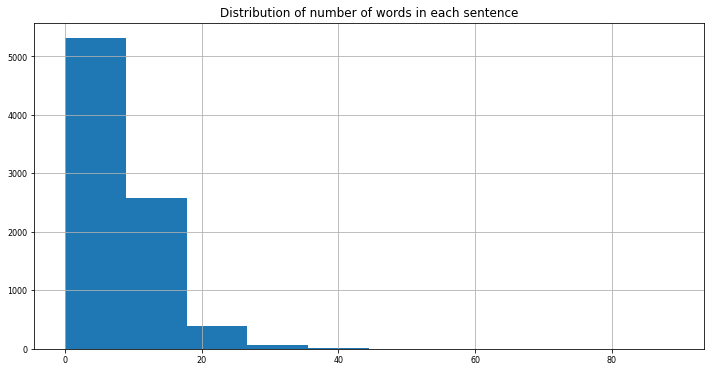

In [45]:
mao_df['NumWords'] = mao_df['Sentence'].apply(lambda x: len(x.split()))
mao_df[['NumWords']].hist(figsize=(12, 6), bins=10, xlabelsize=8, ylabelsize=8);
plt.title("Distribution of number of words in each sentence")

In [46]:
all_words = ''.join([word for word in mao_df['Sentence']]).replace('\n', ' ')
all_words[0:500000]

'WhereI gasped trying to catch my breathI had two minute left for my interview to start and I couldnt adthe roomLost I stopped whoever I could in the confusing corridor of St Stephens College to ask for directionMost student ignored meMany sniggeredI wondered whyWell now I knowMy accentBack in my English wa BihariI dont want to talk now like I did back thenIts embarrassingIt wasnt EnglishIt wa per cent Bihari Hindi mixed with per cent really bad EnglishFor instance this is what I had actually Cumty roombataieyega zaraHamara interview hai na wahanMera khel ka kota haiKis taraf haiIfI start speaking the way I did in those day youll get aheadacheSo Im going to say everything in English just imagine my word in Bhojpurilaced Hindi with the worst possible English thrown inWhere you from man a boy with hair longer than most girlMe Madhav Jha from Dumraon BiharHis friend laughedOver time I learnt that people often ask what they call a rhetorical questionsomething they ask just to make a point 

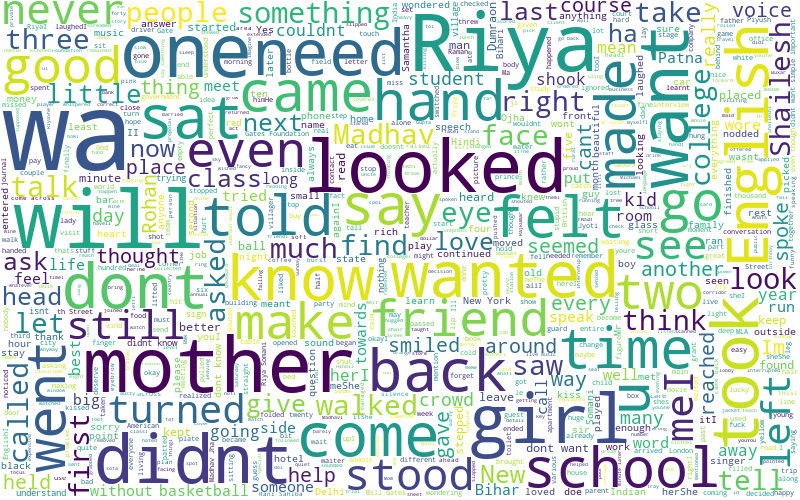

In [47]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [48]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = ''
    lower = texts.lower()
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
    return no_non_ascii
  
mao_df['Sentence2'] = mao_df['Sentence'].apply(normalize_texts)
mao_df.head()
mao_df['Sentence2'] = mao_df['Sentence2'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

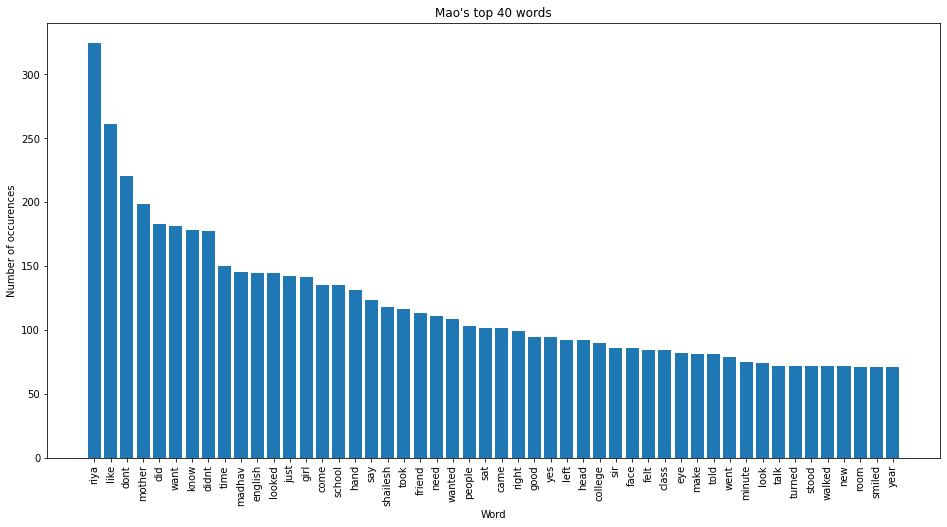

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words = []
word_values = []
for i,j in get_top_n_words(mao_df['Sentence2'], 50):
    words.append(i)
    word_values.append(j)
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title("Mao's top 40 words");
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [50]:
import spacy

nlp = spacy.load('en_core_web_sm')

# Process `text` with Spacy NLP Parser
text = '. '.join(sentences)
processed_text = nlp(text)

In [51]:
# How many sentences are in the book (Pride & Prejudice)?
sentences = [s for s in processed_text.sents]
print(len(sentences))

# Print sentences from index 10 to index 15, to make sure that we have parsed the correct book
print(sentences[10:30])

8600
[I dont want to talk now like I did back then., Its embarrassing., It wasnt English., It wa per cent Bihari Hindi mixed with per cent really bad English., For instance this is what I had actually Cumty room., bataieyega zara., Hamara interview hai na wahan., Mera khel ka kota hai., Kis taraf haiIf., I start speaking the way I did in those day youll get aheadache., So Im going to say everything in English just imagine my word in Bhojpurilaced Hindi with the worst possible English thrown in., Where you from man a boy with hair longer than most girl., Me Madhav Jha from Dumraon Bihar., His friend laughed., Over time I learnt that people often ask what they call a rhetorical questionsomething they ask just to make a point not expecting an answer., Here the point wa to demonstrate that I wa an alien amongst them., What are you interviewing for., Peon., the longhaired boy and laughed., I didnt know enough English back then to be offended.]


In [52]:
# Extract all the personal names and count their occurrences. 
# Expected output is a list in the following form: [('xxx', 622), ('yyy', 312), ('zzz', 286), ...].

from collections import Counter, defaultdict

def find_character_occurences(doc):
    """
    Return a list of actors from `doc` with corresponding occurences.
    
    :param doc: Spacy NLP parsed document
    :return: list of tuples in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    characters = Counter()
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            characters[ent.lemma_] += 1
            
    return characters.most_common()

print(find_character_occurences(processed_text)[:80])

[('Riya', 175), ('Rohan', 36), ('Jyoti', 28), ('Riya Somani', 18), ('Rani Sahiba', 18), ('Ojha', 18), ('Bill Gates', 14), ('Piyush', 11), ('Madhav', 11), ('Somani', 11), ('Verma', 10), ('Raman', 9), ('Shaileshs', 9), ('Chris', 8), ('Michael', 8), ('St Stephens', 7), ('riya', 7), ('Madhav Jha', 7), ('Rajkumar ji', 7), ('Prof Gupta', 6), ('Yamini', 6), ('Ma', 6), ('Olara', 6), ('Priya', 6), ('Cafe Wha', 6), ('Gupta', 5), ('Dad', 5), ('I.', 5), ('Phil', 5), ('Daisy', 5), ('Prof Fernandez', 4), ('Tshirt', 4), ('Silent Riya', 4), ('Rachita', 4), ('Kaushal', 4), ('Samantha', 4), ('Erica', 4), ('Pereira', 3), ('Prof Pereira', 3), ('Bihar', 3), ('shaileshs', 3), ('Aurangzeb Road', 3), ('I. Ill', 3), ('Ill', 3), ('Samanthas', 3), ('Jha', 3), ('Rachel', 3), ('i.', 3), ('Maurya Complex', 3), ('Hemant', 3), ('Shailesh', 3), ('Matt', 3), ('Pylos', 3), ('Doug', 3), ('Piyush Yadav', 2), ('Hindimedium', 2), ('statelevel', 2), ('Biharis', 2), ('my head', 2), ('rez', 2), ('Rashtrapati Bhavan', 2), ('Riy

In [53]:
# Plot characters' mentions as a time series relative to the position of the actor's occurrence in a book.

def get_character_offsets(doc):
    """
    For every character in a `doc` collect all the occurences offsets and store them into a list. 
    The function returns a dictionary that has actor lemma as a key and list of occurences as a value for every character.
    
    :param doc: Spacy NLP parsed document
    :return: dict object in form
        [('xxx', 622), ('yyy', 312), ('zzz', 286), ...]
    """
    
    character_offsets = defaultdict(list)
    for ent in doc.ents:
        if ent.label_ == 'PERSON':
            character_offsets[ent.lemma_].append(ent.start)
            
    return dict(character_offsets)

character_occurences = get_character_offsets(processed_text)

In [54]:
print(list(character_occurences.keys()))

['Bihari Hindi', 'Mera khel', 'Dumraon Bihar', 'Pereira', 'Fernandez', 'Gupta', 'Prof Pereira', 'Yadav', 'Prof Fernandez', 'Prof Gupta', 'StStephens', 'Prof Gupta why', 'Hindi', 'Piyush Yadav', 'Bihar se ho', 'Piyush', 'Hindimedium', 'Prof Guptaremarked', 'Lalu Prasads', 'Bihar', 'I. People', 'SirHe', 'Tshirt', 'youaregood i. Uttering', 'Trialva hai ya mazaak', 'statelevel', 'Biharis', 'Riya', 'nameshe', 'St Stephens', 'my head', 'jean', 'joinedI', 'Riya Somani English Hons', 'Riya Somani', 'Silent Riya', 'Scared Madhav', 'Rani Sahiba', 'Cmon', 'Rachita', 'Riya Garima', 'Vood', 'Hey Riya', 'Shah RukhKhan', 'Khan', 'rez', 'Silent Riyas', 'Rashtrapati Bhavan', 'Riya I.', 'Rajpath', 'Miss Riya', 'Whatshe', 'Madhav', 'howTheres', 'invitationshe Ill', 'Raman', 'Stwphens', 'Mohammed Rafi', 'Michael JacksonBeat', 'shaileshs', 'Shaileshs English', 'Jharkhandi', 'Aurangzeb Road', 'Marwari', 'Bihar I.', 'Fatso', 'Madhav Madhav Jha', 'Riyas', 'take', 'riya', 'Yamini', 'Yamini Riya', 'sushi', 'Riy

In [55]:
[x for x in list(character_occurences.keys()) if any([x.startswith(y) for y in ['Riya','']])]

['Bihari Hindi',
 'Mera khel',
 'Dumraon Bihar',
 'Pereira',
 'Fernandez',
 'Gupta',
 'Prof Pereira',
 'Yadav',
 'Prof Fernandez',
 'Prof Gupta',
 'StStephens',
 'Prof Gupta why',
 'Hindi',
 'Piyush Yadav',
 'Bihar se ho',
 'Piyush',
 'Hindimedium',
 'Prof Guptaremarked',
 'Lalu Prasads',
 'Bihar',
 'I. People',
 'SirHe',
 'Tshirt',
 'youaregood i. Uttering',
 'Trialva hai ya mazaak',
 'statelevel',
 'Biharis',
 'Riya',
 'nameshe',
 'St Stephens',
 'my head',
 'jean',
 'joinedI',
 'Riya Somani English Hons',
 'Riya Somani',
 'Silent Riya',
 'Scared Madhav',
 'Rani Sahiba',
 'Cmon',
 'Rachita',
 'Riya Garima',
 'Vood',
 'Hey Riya',
 'Shah RukhKhan',
 'Khan',
 'rez',
 'Silent Riyas',
 'Rashtrapati Bhavan',
 'Riya I.',
 'Rajpath',
 'Miss Riya',
 'Whatshe',
 'Madhav',
 'howTheres',
 'invitationshe Ill',
 'Raman',
 'Stwphens',
 'Mohammed Rafi',
 'Michael JacksonBeat',
 'shaileshs',
 'Shaileshs English',
 'Jharkhandi',
 'Aurangzeb Road',
 'Marwari',
 'Bihar I.',
 'Fatso',
 'Madhav Madhav Jha

In [56]:
# Extract Keywords using noun chunks from the news article (file 'article.txt').
# Spacy will pick some noun chunks that are not informative at all (e.g. we, what, who).
# Try to find a way to remove non informative keywords.

#article = read_file('data/article.txt')
#doc = nlp(article)
doc = processed_text

keywords = Counter()
for chunk in doc.noun_chunks:
    if nlp.vocab[chunk.lemma_].prob < - 8: # probablity value -8 is arbitrarily selected threshold
        keywords[chunk.lemma_] += 1

keywords.most_common(20)

[('I', 4020),
 ('she', 1419),
 ('you', 1179),
 ('it', 752),
 ('he', 556),
 ('we', 408),
 ('they', 339),
 ('what', 293),
 ('that', 190),
 ('Riya', 186),
 ('my mother', 133),
 ('this', 120),
 ('who', 83),
 ('something', 79),
 ('u', 76),
 ('Shailesh', 76),
 ('a', 73),
 ('English', 61),
 ('myself', 59),
 ('Madhav', 58)]

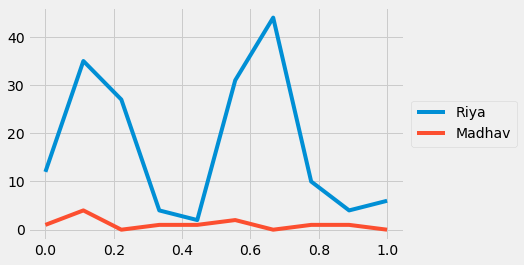

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import hist
from cycler import cycler

NUM_BINS = 10

def normalize(occurencies, normalization_constant):
    return [o / float(len(processed_text)) for o in occurencies]

def plot_character_timeseries(character_offsets, character_labels, normalization_constant=None):
    """
    Plot characters' personal names specified in `character_labels` list as time series.
    
    :param character_offsets: dict object in form {'xxx': [123, 543, 4534], 'yyy': [205, 2111]}
    :param character_labels: list of strings that should match some of the keys in `character_offsets`
    :param normalization_constant: int
    """ 
    x = [character_offsets[character_label] for character_label in character_labels] 
        
    with plt.style.context('fivethirtyeight'):
        plt.figure()
        n, bins, patches = plt.hist(x, NUM_BINS, label=character_labels)
        plt.clf()
        
        ax = plt.subplot(111)
        for i, a in enumerate(n):
            ax.plot([float(x) / (NUM_BINS - 1) for x in range(len(a))], a, label=character_labels[i])
            
        plt.rcParams['axes.prop_cycle'] = cycler(color=['r','k','c','b','y','m','g','#54a1FF'])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#plot_character_timeseries(character_occurences, ['darcy', 'bingley'], normalization_constant=len(processed_text))
plot_character_timeseries(character_occurences, ['Riya', 'Madhav'])

In [109]:
# Performing Text Rank on the given text

In [60]:
# pip install sentence_transformers

In [61]:
from sentence_transformers import SentenceTransformer

In [62]:
# bmodel = SentenceTransformer('stsb-roberta-large') #1,024 dims
#model2 = SentenceTransformer('bert-base-nli-mean-tokens') #768 dims
bmodel_ = SentenceTransformer('all-MiniLM-L6-v2') #384 dims

In [63]:
bert_embeddings = bmodel_.encode(sentences[0:300])
bert_embeddings.shape

(300, 384)

In [64]:
len(sentences)-1

8599

In [65]:
#Print the embeddings
for i, (sentence, embedding) in enumerate(zip(sentences[0:499], bert_embeddings)):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")
    if i == 3: break

Sentence: Where.
Embedding: [-8.66026804e-02 -2.51263324e-02 -2.29121335e-02 -4.73914202e-03
  1.16808295e-01  1.25723062e-02  7.72336125e-02  1.54354703e-02
 -4.01965007e-02 -2.18676105e-02  5.93914725e-02  1.28239514e-02
  6.08963566e-03  2.06822082e-02  7.90322572e-02  1.70781165e-02
 -4.03845832e-02 -8.57076515e-03  2.81217676e-02 -2.61098314e-02
  3.26056033e-02  8.67973715e-02  8.52534845e-02  3.00234761e-02
  4.90102954e-02  3.29654142e-02 -1.88622978e-02  9.38442070e-03
 -5.29127708e-03 -4.72052582e-02 -8.78339410e-02  3.35197411e-02
 -4.44716215e-03  5.25388531e-02 -2.30787247e-02  2.46616919e-02
  5.21806777e-02 -1.74948238e-02  4.70873788e-02  4.86051664e-03
  6.58356771e-02 -1.39179267e-02 -4.77969274e-03  5.65252049e-05
 -5.18821105e-02 -6.11265488e-02 -1.91709734e-02 -4.02458422e-02
  1.06128663e-01  2.33108327e-02 -1.23777643e-01 -1.85972545e-02
 -4.68313172e-02  6.21994399e-02 -5.60749061e-02 -4.04736660e-02
 -2.66348813e-02 -2.49406963e-04  6.60434961e-02 -4.65727188e-

In [66]:
import numpy as np
a = bert_embeddings[0]
b = bert_embeddings[1]
cos_sim = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
cos_sim

0.2842364

In [67]:
bert_embeddings.shape

(300, 384)

In [68]:
from tqdm import tqdm
#M = np.zeros((1933, 1933))
M = np.eye(1933)

for i,a in tqdm(enumerate(bert_embeddings)):
    for j,b in enumerate(bert_embeddings):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))

300it [00:01, 220.28it/s]


In [69]:
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph

In [70]:
# pip install networkx==2.6.3

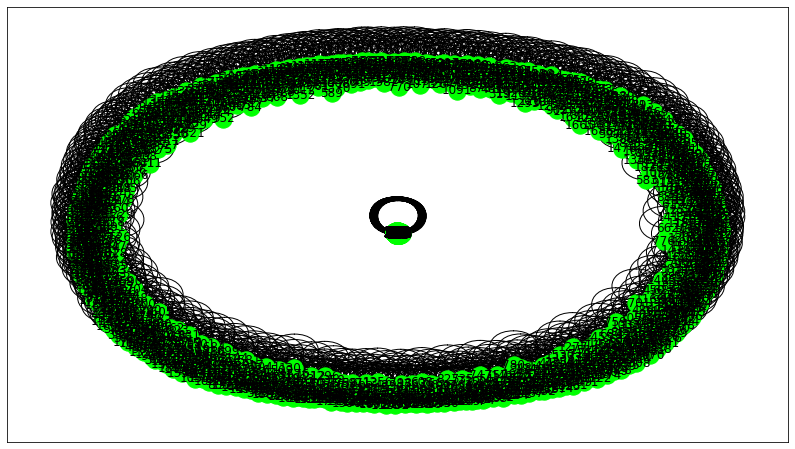

In [71]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')

In [72]:
scores = networkx.pagerank(similarity_graph)
nx_ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_sentences[:10]

[(0.0006371161554020139, 105),
 (0.00063207698094629, 293),
 (0.0006256180047817624, 136),
 (0.0006239401772645085, 132),
 (0.0006239401397777279, 117),
 (0.0006230815779251958, 93),
 (0.0006216196570608857, 260),
 (0.0006212340511595173, 32),
 (0.0006141438567450649, 284),
 (0.0006141438567450649, 283)]

In [73]:
sentences[105]

he The few word in Hindi felt like cold drop of rain on a scorching summer day.

In [74]:
sentences[293]

I now wished I had worn better clothes.

In [75]:
sentences[104]

Are you from Bihar.

In [76]:
for i in range(10):
    print(sentences[nx_ranked_sentences[i][1]])
    print('----------')

he The few word in Hindi felt like cold drop of rain on a scorching summer day.
----------
I now wished I had worn better clothes.
----------
I took my chance and responded in my language.
----------
I am from rural areaI am from a rural area Gupta emphasizing the a a if omitting it wa a criminal offence.
----------
I am Hindimedium too.
----------
I saw my blunder in their horrified face.
----------
I cover R screamed.
----------
I instead looking at his group of friend.
----------
I wanted to take a snapshot of her sweaty face and store it in my mind camera for life.
----------
I wanted to look at her a bit longer.
----------


In [77]:
# pip install scikit-learn-extra

Performing K-Medoids on the data


In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 

In [79]:
from sklearn.datasets import load_digits
digits = load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [80]:
digits.data.shape

(1797, 64)

In [81]:
num_digits = len(np.unique(digits.target))
num_digits

10

In [82]:
np.std(bert_embeddings[0])

0.051023085

In [83]:
bert_embeddings_std = scale(bert_embeddings)

In [84]:
bert_embeddings_red = PCA(n_components=2).fit_transform(bert_embeddings_std)

In [85]:
h = 0.02 #step size of the mesh 
#Minimum and maximum x-coordinates
xmin, xmax = bert_embeddings_red[:, 0].min() - 1, bert_embeddings_red[:, 0].max() + 1
#Minimum and maximum y-coordinates
ymin, ymax = bert_embeddings_red[:, 1].min() - 1, bert_embeddings_red[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(xmin, xmax, h), np.arange(ymin, ymax, h))

In [86]:
models = [
     (
         KMedoids(metric="manhattan", n_clusters=num_digits, 
         init="heuristic", max_iter=2),"Manhattan metric",
     ),
     (
         KMedoids(metric="euclidean", n_clusters=num_digits,  
         init="heuristic", max_iter=2),"Euclidean metric",
     ),
     (KMedoids(metric="cosine", n_clusters=num_digits, init="heuristic", 
      max_iter=2), "Cosine metric", ),
 ]
models

[(KMedoids(max_iter=2, metric='manhattan', n_clusters=10), 'Manhattan metric'),
 (KMedoids(max_iter=2, n_clusters=10), 'Euclidean metric'),
 (KMedoids(max_iter=2, metric='cosine', n_clusters=10), 'Cosine metric')]

In [87]:
#number of rows = integer(ceiling(number of model variants/2))
num_rows = int(np.ceil(len(models) / 2.0))
#number of columns
num_cols = 2 

In [88]:
#Clear the current figure first (if any)
plt.clf()

#Initialize dimensions of the plot
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

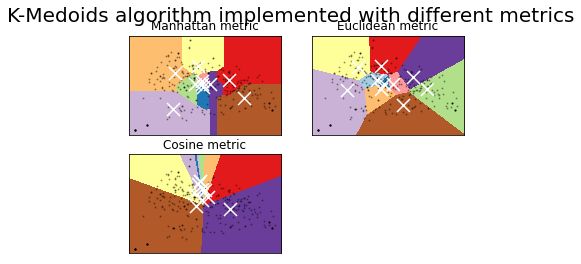

In [89]:
for i, (model, description) in enumerate(models):
    # Fit each point in the mesh to the model
    model.fit(bert_embeddings_red)
    
    #Predict the labels for points in the mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result  into a color plot
    Z = Z.reshape(xx.shape)
   
    #Subplot for the ith model variant
    plt.subplot(num_cols, num_rows, i + 1)
   
    #Display the subplot
    plt.imshow(
         Z,    #data to be plotted
         interpolation="nearest",
        #bounding box coordinates (left,right,bottom,top)
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,  #colormap
         aspect="auto", #aspect ratio of the axes
         origin="lower",  #set origin as lower left corner of the axes
    )
    plt.plot(
         bert_embeddings_red[:, 0], bert_embeddings_red[:, 1], "k.", markersize=2, alpha=0.3
    )
        
    # Plot the centroids as white cross marks
    centroids = model.cluster_centers_
    plt.scatter(
         centroids[:, 0],
         centroids[:, 1],
         marker="x",
         s=169,  #marker’s size (points^2)
         linewidths=3, #width of boundary lines
         color="w",  #white color for centroids markings
         zorder=10,  #drawing order of axes
    )
    
    #describing text of the tuple will be title of the subplot
    plt.title(description)  
    plt.xlim(xmin, xmax)  #limits of x-coordinates
    plt.ylim(ymin, ymax)  #limits of y-coordinates
    plt.xticks(())   
    plt.yticks(())
    
#Upper title of the whole plot
plt.suptitle(
    #Text to be displayed
    "K-Medoids algorithm implemented with different metrics\n\n",
    fontsize=20,  #size of the fonts
)
plt.show()

In [90]:
centroids

array([[-0.10183624,  1.3000764 ],
       [-0.539401  ,  5.6103787 ],
       [-0.21038914,  3.7729332 ],
       [-0.5393976 ,  5.6103783 ],
       [ 0.77463907,  1.9561925 ],
       [ 0.30598202,  3.6957538 ],
       [-0.7970674 ,  5.0093756 ],
       [ 4.3576818 , -0.88231426],
       [-1.5243331 ,  2.9179914 ],
       [-1.165515  , -0.14803311]], dtype=float32)

In [91]:
centroids = []
for i, (model, description) in enumerate(models):
    model.fit(bert_embeddings_std)
    centroids.append(model.cluster_centers_)

In [92]:
centroid_indeces = []

for i in range(10):
    c = centroids[2][i]
    for j in range(bert_embeddings_std.shape[0]):
        if np.allclose(c, bert_embeddings_std[j]):
            centroid_indeces.append(j)
            break

In [93]:
centroid_indeces

[2, 261, 49, 88, 49, 49, 29, 49, 29, 72]

In [94]:
for i in centroid_indeces:
    print(i, ' -------')
    print(sentences[i])
    print('---------')

2  -------
I had two minute left for my interview to start and I couldnt adthe room.
---------
261  -------
Her state of mind wa a far from mine a possible.
---------
49  -------
I didnt think it wa a good smile.
---------
88  -------
but I did not want them to know thatYour. college ha a big name.
---------
49  -------
I didnt think it wa a good smile.
---------
49  -------
I didnt think it wa a good smile.
---------
29  -------
I didnt know enough English back then to be offended.
---------
49  -------
I didnt think it wa a good smile.
---------
29  -------
I didnt know enough English back then to be offended.
---------
72  -------
Do you speak in full sentence.
---------


In [95]:
# pip install text2emotion

In [96]:
# pip install emoji==1.7.0

Performing Sentiment Analysis on the Data

In [97]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [98]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [103]:
sentiment = te.get_emotion(str(sentences[0:2000]))

In [105]:
sentiment

{'Happy': 0.13, 'Angry': 0.09, 'Surprise': 0.21, 'Sad': 0.21, 'Fear': 0.36}

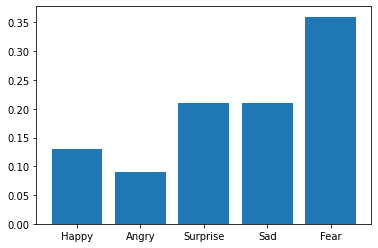

In [104]:
import matplotlib.pyplot as plt

data = sentiment
names = list(data.keys())
values = list(data.values())

plt.bar(range(len(data)), values, tick_label=names)
plt.show()

Applying the Computational Model on the Data (Negative Binomial Model)

In [111]:
book123 = read_book('Titanic.txt')
emptylist = []
paragraphs = book123.split(".")
emptylist.extend(paragraphs)
len(emptylist)

8574

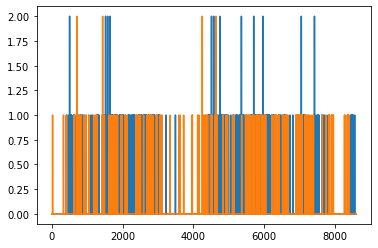

In [112]:
def get_words_paragraphs(paragraphs, words):
#     para = []
    word_para = defaultdict(list)
    for p in sentences:
        for w in words:
#             para.append(p)
            word_para[w].append(str(p).count(w))
#     return para  
    return dict(word_para)

peasant_gentry_occurences = get_words_paragraphs(emptylist, ['Riya', 'Madhav'])
peasant_occurences = [v for k,v in peasant_gentry_occurences.items() if k == 'Riya'][0]
gentry_occurences = [v for k,v in peasant_gentry_occurences.items() if k == 'Madhav'][0]

plt.plot(peasant_occurences)
plt.plot(gentry_occurences)
# peasant_gentry_occurences

In [113]:
moral_words = []

with open('./mfd.txt', "r") as input:
    pair_lines = input.read().split("\n")
for p in pair_lines:
    moral_words.append(p.split('\t')[0])
# moral_words.remove("")
print(moral_words[0:10])

['compassion', 'empathy', 'kindness', 'caring', 'generosity', 'benevolence', 'altruism', 'compassionate', 'nurture', 'gentleness']


100%|██████████| 8574/8574 [00:04<00:00, 1854.35it/s]


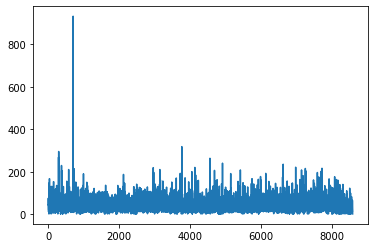

In [114]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

moral_occurences = get_any_words_paragraphs(emptylist, moral_words)
plt.plot(moral_occurences)

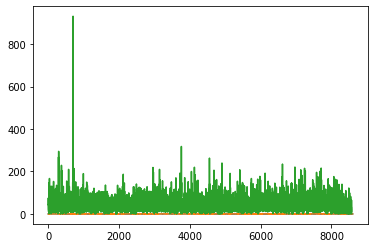

In [115]:
plt.plot(peasant_occurences)
plt.plot(gentry_occurences)
plt.plot([m for m in  moral_occurences])

In [116]:
bool_peasant_occurences = [bool(v) for v in peasant_occurences]
bool_gentry_occurences = [bool(v) for v in gentry_occurences]

In [117]:
df_moral = pd.DataFrame(list(zip(moral_occurences, gentry_occurences, peasant_occurences)), 
                        columns =['morals', 'Madhav', 'Riya'])
df_moral

,morals,Madhav,Riya
0,44,0,0
1,75,0,0
2,67,0,0
3,40,0,0
4,25,0,0
...,...,...,...
8569,33,0,0
8570,20,0,0
8571,28,0,0
8572,12,0,0


In [119]:
# pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 872 kB 5.2 MB/s 
     |████████████████████████████████| 1.8 MB 56.1 MB/s 
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=b7575d7d57a8770f93b30bc8e38c3ecb804256bc829673df8275b082786a9e93
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [120]:
import pymc3 as pm

In [122]:
fml = 'morals ~ Madhav + Riya + Madhav:Riya'

with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_moral, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(4000, cores=2)

We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [133]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, varnames=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,varnames=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')

def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

In [134]:
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
rvs

['Intercept', 'Madhav', 'Riya', 'Madhav:Riya', 'mu', 'alpha']

In [136]:
np.percentile(trace[1000:]['mu'], [25,50,75])

array([ 4.05806065, 10.06236228, 23.95394636])

In [142]:
trace[1000:]['alpha'].mean()

2.266914644177957